# 4.9 Pivot Table & Crosstab trong Pandas

_(Bản FINAL – CLEAN, chi tiết để giảng dạy)_

## Chuẩn bị dữ liệu
Trong phần này, chúng ta sử dụng bộ dữ liệu từ file **‘titanic.csv’** lưu dữ liệu của vụ đắm tàu Titanic làm dữ liệu thao tác với Pivot Table. Chúng ta có thể truy cập cơ sở dữ liệu này là thông qua thư viện Seaborn. 
* #### Seaborn là một thư viện trực quan hóa dữ liệu phụ thuộc vào thư viện matplotlib. 
#### **a.Dữ liệu sử dụng**:
Để sử dụng cơ sở dữ liệu Titanic trong ví dụ, chúng ta cần cài đặt thư viện Seaborn (nếu chưa có) và import thư viên seaborrn vào trong mã (code) của mình. 
Có thể dùng pip để cài thư viện seaborn như sau:
Mở cmd command ở chế độ Administrator sau đó gõ lệnh: pip install searbon, hoặc ngay trong notebook như sau:

***Lưu ý***: Phần cài đặt thư viện seaborn chỉ áp dụng khi chưa cài đặt (nếu đã cài có thể bỏ qua)
>Có thể kiểm tra đã cài chưa bằng cách sử dụng pip như sau

In [1]:
!pip show seaborn

Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: C:\Users\ADMIN\AppData\Roaming\Python\Python313\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 


> Trường hợp chưa cài thì gõ 2 lệnh sau (ngay trong jupyter notebook)

In [ ]:
!python.exe -m pip install --upgrade pip

In [ ]:
%pip install seaborn

### Load cơ sở dữ liệu Titanic, và hiển thị 05 mẫu đầu tiên

In [2]:
import pandas as pd
import seaborn as sns

# Nạp dữ liệu Titanic
titanic_data = sns.load_dataset("titanic")

# Hiển thị một số mẫu dữ liệu
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Một số thông tin chính
* **survived**: Số liệu nhị phân (0 hoặc 1) chỉ ra liệu hành khách có sống sót hay không.
* **pclass**: Lớp hành khách (1, 2 hoặc 3) cho biết hành khách thuộc lớp nào trên tàu.
* **sex**: Giới tính của hành khách (nam hoặc nữ).
* **age**: Tuổi của hành khách.
* **fare**: Số tiền vé đã trả.
* **sibsp**: Số lượng anh em chị em/vợ chồng đi cùng trên tàu.
* **parch**: Số lượng cha mẹ/con cái đi cùng trên tàu.
* **embarked**: Cảng lên tàu (C = Cherbourg, Q = Queenstown, S = Southampton).


## 4.9.1. Giới thiệu Pivot Table
Mục tiêu của phần này là:
- Nhắc lại nhanh cơ chế `groupby()` đã học ở 4.8.
- Đặt vấn đề: vì sao `groupby()` + `unstack()` có thể dài và khó đọc khi viết báo cáo.
- Giới thiệu khái niệm, cú pháp và ví dụ cơ bản của `pivot_table()`.
- So sánh bản chất giữa GroupBy và Pivot Table.

>### ***4.9.1.1. Đặt vấn đề***
#### a) Nhắc lại GroupBy
Ở mục 4.8, chúng ta đã học cơ chế **Split–Apply–Combine** với `groupby()`. Ví dụ đơn giản: tính tuổi trung bình của hành khách theo giới tính:

In [5]:
titanic_data.groupby("sex")["age"].mean()

sex
female    27.915709
male      30.726645
Name: age, dtype: float64

#### b) Tổng hợp dữ liệu bằng GroupBy (theo TLHT)
Giờ ta muốn tổng hợp **tuổi trung bình** theo **giới tính** *và* **khoang** (`class`). Cách dùng `groupby()` + `unstack()` như sau:

In [6]:
gb_age = titanic_data.groupby(["sex", "class"])["age"].mean()
gb_age_unstack = gb_age.unstack()
gb_age_unstack

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_39736\1574282673.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gb_age = titanic_data.groupby(["sex", "class"])["age"].mean()


class,First,Second,Third
sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


Nhận xét sư phạm:
- Kết quả đúng và linh hoạt, nhưng DataFrame thu được dùng **MultiIndex** nếu không `unstack()`.
- Cần ít nhất 2 bước: `groupby()` → `mean()` → `unstack()`.
- Với báo cáo tổng hợp nhiều chiều, cách viết này **dài và khó đọc hơn** so với một bảng 2D thuần.

>### ***4.9.1.2. Khái niệm Pivot Table***
#### a) Khái niệm
**Pivot Table** trong pandas là một cơ chế *tổng hợp dữ liệu đa chiều* (**multidimensional aggregation**) được tối ưu hóa cho **dạng bảng 2 chiều (2D tabular form) với (index x columns)**.  
Nó kết hợp đồng thời ba thao tác cốt lõi trên dữ liệu:

1. **Phân nhóm (split)** – chia dữ liệu theo cặp `index` và `columns`.
2. **Áp dụng hàm tổng hợp (Aggregation-apply/aggreagate)** – lên mỗi nhóm (`mean, sum, count`,...).
3. **Tái cấu trúc dữ liệu (Reshaping / Pivoting)** kết quả thành ma trận 2D.

> Đây chính là pipeline “**group → aggregate → reshape**” được hợp nhất trong **một lệnh duy nhất**.

### b). Bản chất toán học của Pivot Table
Về bản chất, Pivot Table thực hiện ánh xạ dữ liệu từ **long format → wide format**, nơi:
- **Hàng (Index)** = biến phân loại thứ nhất  
- **Cột (Columns)** = biến phân loại thứ hai  
- **Giá trị (Values)** = kết quả tổng hợp của biến số  

Mỗi ô trong ma trận là kết quả của một hàm tổng hợp `f` (mean, sum, count, ...), áp dụng trên tập các quan sát cùng chia sẻ một cặp (index, column).

>Do đó, Pivot Table trở thành mô hình hiệu quả nhất để tạo **báo cáo tổng hợp đa chiều** (summary report) và trực quan hóa mối quan hệ giữa các biến phân loại.

### 🎯 **Ghi nhớ**
>**Pivot Table là cơ chế tổng hợp dữ liệu được tối ưu cho bảng 2D, kết hợp **GroupBy và Unstack** trong một thao tác, giúp tạo báo cáo đa chiều trực quan và dễ đọc.**

### c). Sơ đồ Split–Apply–Combine–Reshape
Có thể hình dung quá trình Pivot Table qua sơ đồ sau:

```text
DataFrame ban đầu
        │
        ├─ Split: chia dữ liệu theo (index × columns)
        │
        ├─ Apply: áp dụng hàm tổng hợp lên cột values
        │
        ├─ Combine: gom kết quả các nhóm
        │
        └─ Reshape: xếp lại thành ma trận 2D (Pivot Table)
```

### d). Cú pháp:
```python
pd.pivot_table(
    data,
    values=None,index=None,columns=None,
    aggfunc='mean',fill_value=None,margins=False,
    dropna=True, margins_name='All', observed=False
)
```
Trong đó:
- `data`: DataFrame nguồn.
- `values`: cột số liệu cần tổng hợp (vd: `age`, `fare`, `survived`, …).
- `index`: cột/nhóm làm chỉ mục hàng.
- `columns`: cột/nhóm làm chỉ mục cột.
- `aggfunc`: hàm tổng hợp, mặc định là `'mean'` (trung bình).
- `fill_value`: giá trị lấp vào chỗ NA sau tổng hợp (nếu có).
- `margins=True`: thêm hàng/ cột `'All'` để tổng hợp toàn bộ.
- `margins_name`: tên của hàng/cột tổng (`'All'` mặc định).
- `observed`: Chỉ áp dụng khi một (hoặc nhiều) cột trong `index` hoặc `columns` có kiểu dữ liệu **category** (Categorical).  
  - `observed=True` → **Chỉ hiển thị những category thực sự có dữ liệu** trong bảng kết quả (sạch sẽ, hợp lý, không có hàng/cột trống NaN). Đây là hành vi sẽ thành mặc định trong pandas tương lai.  
  - `observed=False` → Hiển thị **tất cả các category đã được định nghĩa**, kể cả những category không có dữ liệu nào trong nhóm đó → sẽ xuất hiện hàng/cột NaN. 
  - Đây là hành vi cũ, hiện đang bị pandas cảnh báo FutureWarning.  
  → **Khuyến cáo mạnh từ 2024–2025 trở đi: luôn đặt `observed=True`** để bảng đẹp, không warning và code không bị lỗi khi pandas ra bản 3.0+.

#### **Lưu ý:** dữ liệu trả về, các cấp trong Pivot Tables sẽ dùng **MultiIndex để xác định chỉ mục và cột của DataFrame**.

#### Ví dụ cơ bản. 
Ta viết lại bài toán ở trên (tuổi trung bình theo giới tính(**sex**) × khoang(**class**)) bằng `pivot_table()`:

In [5]:
pivot_age = pd.pivot_table(
    titanic_data,
    values="age",
    index="sex",
    columns="class",
    aggfunc="mean"
)
pivot_age

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20332\2400583596.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_age = pd.pivot_table(


class,First,Second,Third
sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


Nhận xét:
- Cùng một bài toán, `pivot_table()` chỉ cần **một dòng**.
- Kết quả trả về ngay một bảng 2D với hàng = `sex`, cột = `class`, ô = tuổi trung bình.
- Rất phù hợp để đưa trực tiếp vào **báo cáo, slide, dashboard**.

>### ***4.9.1.3. So sánh GroupBy và Pivot Table***
Bảng tổng hợp sau giúp phân biệt rõ hai công cụ:

| Tiêu chí                  | GroupBy                                  | Pivot Table                                      |
|---------------------------|------------------------------------------|--------------------------------------------------|
| Mục tiêu chính            | Tính toán linh hoạt, thao tác sâu        | Tổng hợp & trình bày 2D cho báo cáo              |
| Dạng kết quả mặc định     | Series/DataFrame (thường là MultiIndex)  | DataFrame 2D với index × columns                 |
| Cú pháp                   | Thường cần nhiều bước (groupby → agg → unstack) | Thường gói gọn trong 1 dòng                     |
| Tập trung cho             | Nhà phân tích dữ liệu (analyst)          | Người ra quyết định / báo cáo (manager, user)    |
| Ứng dụng tiêu biểu        | EDA chi tiết, xử lý trung gian           | Bảng tổng hợp, Pivot giống Excel                 |

## 4.9.1.4. Data Quality Check trước Pivot Table
Trước khi áp dụng Pivot Table, ta cần kiểm tra nhanh **chất lượng dữ liệu**:
- Số lượng giá trị thiếu (NaN) theo từng cột.
- Các cột phân loại (`sex`, `class`, `embark_town`, ...) có phân phối lệch quá không.
Bước này giúp tránh hiểu nhầm khi đọc kết quả pivot.

In [7]:
titanic_data.isna().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

Quan sát thấy: các cột như `age`, `deck`, `embark_town` chứa khá nhiều giá trị NA.  
Để đơn giản hóa cho phần Pivot Table, thực hiện chuẩn hóa dữ liệu:

- Xóa cột `deck` (chứa rất nhiều NA).
- Xóa các hàng chứa **bất kỳ** giá trị NA nào còn lại.

(Ví dụ 4.9.1.3 trong TLHT).

In [8]:
# Ví dụ 4.9.1.3 – Làm sạch dữ liệu
print('Số hàng ban đầu của CSDL:', len(titanic_data))

# Xóa cột 'deck'
titanic_data.drop(labels='deck', axis=1, inplace=True)

# Xóa toàn bộ các hàng có chứa giá trị NA
titanic_data.dropna(how='any', axis=0, inplace=True)

print('Số hàng còn lại trong CSDL:', len(titanic_data))

Số hàng ban đầu của CSDL: 891
Số hàng còn lại trong CSDL: 712


## **Lưu ý**: Khi xử lý dữ liệu thiếu (NA Imputation)
Trong bài giảng này, ta dùng cách đơn giản là `dropna()` trên một số cột trọng yếu để tập trung vào **cú pháp Pivot Table**.
Tuy nhiên, về mặt Khoa học Dữ liệu, sinh viên cần biết thêm:
- **Mean/Median imputation** cho cột số (`age`, `fare`).
- **Mode imputation** cho cột phân loại (`embarked`, `embark_town`).
- **Gán nhãn đặc biệt** như `'Unknown'`, `'Missing'` cho các cột phân loại.
#### Các kỹ thuật nâng cao hơn (KNN, MICE) sẽ được học trong các học phần DS sau.

## **4.9.2. Phân tích Dữ liệu Nâng cao**
Phần này sẽ tập trung vào sự linh hoạt của các tham số.
>#### ***4.9.2.1.Đa dạng hóa hàm tổng hợp*** (aggfunc)
Tham số aggfunc (Aggregation Function) xác định hàm thống kê được áp dụng cho dữ liệu ở cột values trong Pivot Table. Mặc định là 'mean' (trung bình), nhưng aggfunc có thể chấp nhận nhiều loại hàm khác nhau, bao gồm:
1. Chuỗi (`Strings`): Ví dụ: 'sum' (tổng), 'count' (đếm), 'min' (nhỏ nhất), 'max' (lớn nhất).

2. Hàm (`Functions`): Ví dụ: numpy.median (trung vị) hoặc numpy.std (độ lệch chuẩn).

3. Danh sách các hàm (`List of Functions`): Ví dụ: ['mean', 'count', 'sum'] để tính toán nhiều chỉ số cùng lúc.

4. Hàm tự định nghĩa (`Custom Functions`): Các hàm do người dùng tự viết bằng lambda hoặc def để thực hiện các phép tính phức tạp hơn."

#### **a). Sử dụng danh sách hàm Tổng hợp**(List of Functions)
#### Ví dụ 4.9.2.1a. **aggfunc=['mean','sum','count']**

Yêu cầu: Tính **số lượng người sống sót** (sum) và **Tỷ lệ sống sót** (mean) theo Giới tính (sex) và Lớp hành khách (class).


In [7]:
#import numpy để sử dụng các hàm thống kê
import numpy as np

survival_stats = pd.pivot_table(        #survival_stats: Thống kê về tỷ lệ sống sót
    data=titanic_data,
    index=['sex', 'class'],
    values='survived',
    aggfunc=['mean', 'sum', 'count'], # Sử dụng 3 hàm cùng lúc
    observed=True       # Chỉ hiển thị các nhóm thực sự tồn tại trong dữ liệu
)

print(survival_stats)

                   mean      sum    count
               survived survived survived
sex    class                             
female First   0.963855       80       83
       Second  0.918919       68       74
       Third   0.460784       47      102
male   First   0.396040       40      101
       Second  0.151515       15       99
       Third   0.150198       38      253


#### **Nhận xét**
Khi sử dùng nhiều aggfunc mà chỉ truyền một values duy nhất là 'survived', pandas sẽ hiểu là:
“Áp dụng 3 hàm mean, sum, count cùng lên cột 'survived' → nên cả 3 cột con đều mang tên 'survived'”.← SAI NGỮ NGHĨA HOÀN TOÀN

#### Cách khắc phục đơn giản nhất

In [8]:
survival_stats = titanic_data.pivot_table(
    values='survived',
    index=['sex', 'class'],
    aggfunc=['mean', 'sum', 'count'],
    observed=True
)

# Đổi tên cột cho đúng nghĩa
survival_stats.columns = ['Tỷ_lệ_sống', 'Số_người_sống', 'Tổng_số_người']
print(survival_stats)

               Tỷ_lệ_sống  Số_người_sống  Tổng_số_người
sex    class                                           
female First     0.963855             80             83
       Second    0.918919             68             74
       Third     0.460784             47            102
male   First     0.396040             40            101
       Second    0.151515             15             99
       Third     0.150198             38            253


Những kết luận “không thể chối cãi” từ bảng này:

* Phụ nữ hạng nhất gần như sống 100%
→ 96.4% là con số cao đến mức gần như toàn bộ phụ nữ giàu có được cứu trước.
* Phụ nữ hạng nhì vẫn sống hơn 91%
→ Dù không giàu bằng hạng nhất, nhưng vẫn được ưu tiên cực cao.
* Phụ nữ hạng ba chỉ sống 46%
→ Vẫn cao hơn đàn ông cùng hạng rất nhiều, nhưng đã giảm mạnh → cho thấy quy tắc `“women and children first”` vẫn áp dụng, nhưng có giới hạn khi tàu chìm quá nhanh và khoang hạng ba bị khóa cửa lâu hơn.
* Đàn ông hạng nhất sống cao hơn đàn ông hạng 2 & 3 rất nhiều
→ 39.6% so với 15% → `tiền và địa vị xã hội vẫn cứu được một phần đàn ông giàu`.
* Đàn ông hạng 2 và hạng 3 gần như không có cơ hội
→ Chỉ 15% → hầu như bị bỏ lại hoàn toàn. `Đặc biệt đàn ông hạng 3` có tới 253 người nhưng chỉ 38 người sống (15%).
>#### Thứ tự ưu tiên cứu người trên Titanic thực tế là:
1. Phụ nữ hạng 1
2. Phụ nữ hạng 2
3. Trẻ em (dữ liệu khác sẽ cho thấy trẻ em cũng được ưu tiên cao)
4. Phụ nữ hạng 3
5. Đàn ông hạng 1
6. Đàn ông hạng 2 & 3 (gần như bị bỏ lại)

>Số lượng người (count) cho biết kích thước mẫu của nhóm đó (Ví dụ: có 253 nam hạng Ba). Việc này rất quan trọng để tránh kết luận sai lệch khi nhóm có số lượng quan sát quá ít.


#### **b). Ánh xạ Hàm Tổng hợp cho từng Cột** (Dictionary Mapping)
  - Trong thực tế, chúng ta thường muốn tính toán khác nhau cho các cột khác nhau. 
    - Ví dụ: Tính ***tổng chi tiêu***(sum) cho cột fare và ***trung bình*** (mean) cho cột survived.

  - Chúng ta truyền vào một ***Dictionary*** với khóa là tên cột và giá trị là hàm tổng hợp: {column_name: agg_function}.
#### Ví dụ 4.9.2.1b. tính tổng tiền vé(`fare`) và tỷ lệ sống sót(`survived`) theo Giới tính(`sex`) và Cảng lên tàu(`embarked`)

In [9]:
# Phân tích tổng tiền vé và tỷ lệ sống sót theo Giới tính và Cảng lên tàu
mixed_agg = pd.pivot_table(
    data=titanic_data,
    index=['sex'],
    columns='embark_town',
    values=['fare', 'survived'],
    aggfunc={'fare': 'sum', 'survived': 'mean'} # Ánh xạ hàm cho từng cột
)

print(mixed_agg)

                  fare                         survived                       
embark_town  Cherbourg Queenstown Southampton Cherbourg Queenstown Southampton
sex                                                                           
female       4876.1876   208.3667   7174.5459  0.901639   0.583333    0.715054
male         4002.3921   303.0750   8047.3157  0.347826   0.062500    0.184783


#### Phân tích dữ liệu
  - Phụ nữ Cherbourg = gần như sống 100% (90.2%)
→ Họ bỏ xa tất cả các nhóm còn lại. Cherbourg rõ ràng là “cảng của người giàu & may mắn”.
  - Đàn ông Queenstown = gần như chết chắc (chỉ 6.25%)
→ 16 người đàn ông lên ở Queenstown thì chỉ 1 người sống sót! Đây là con số kinh hoàng nhất toàn bộ con tàu. Hầu hết là dân Ireland nghèo đi hạng 3, bị nhốt dưới khoang.
  - Tổng tiền vé của nam Southampton cao nhất (8 047)
→ Vì số lượng đàn ông cực đông (hơn 800 người), dù mỗi người trả ít tiền nhưng tổng lại vẫn “hốt” nhiều nhất. Nhưng tỷ lệ sống thì thảm hại: chỉ 18.5%.
  - Phụ nữ Queenstown dù nghèo (fare chỉ 208) nhưng vẫn sống tới 58.3%
→ Vẫn cao gấp gần 10 lần đàn ông cùng cảng! → quy tắc “women first” vẫn hoạt động mạnh, dù ở nhóm nghèo nhất.
  - Cherbourg là thiên đường, Queenstown là địa ngục
     - Phụ nữ Cherbourg: 90% sống
     - Đàn ông Queenstown: 6% sống
     → Chênh lệch 15 lần chỉ vì giới tính + cảng lên tàu.

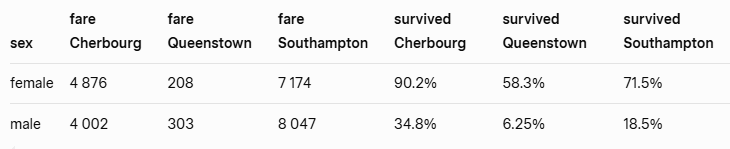

“Trên con tàu định mệnh đó, 
  - Nếu bạn là `phụ nữ lên ở Cherbourg` → **gần như chắc chắn sống**.
  - Nếu bạn là `đàn ông lên ở Queenstown` → **gần như chắc chắn chết**.
  - `Tiền bạc, giai cấp, giới tính và cảng lên tàu quyết định tất cả!!!` 
  >thậm chí còn hơn cả việc bạn biết bơi hay không!!!.”

#### **c). Sử dụng hàm Tổng hợp tự định nghĩa** (Custom Function): 
* ##### Ví dụ: định nghĩa một hàm sử dụng `lambda`:
```python 
            lambda x: x.max() - x.min()
```

#### Ví dụ 4.9.2.1c. Tính khoảng biến thiên (`Range`) của giá vé (`fare`) trên bộ dữ liệu Titanic.

Mục tiêu:
tính khoảng biến thiên (Range) của giá vé (fare) cho từng nhóm hành khách (ví dụ: nhóm theo Lớp hành khách class và Giới tính sex). 
Khoảng biến thiên được định nghĩa là Giá trị lớn nhất trừ đi Giá trị nhỏ nhất (Max - Min).

In [12]:
import numpy as np
# 1. Định nghĩa Hàm Tùy Chỉnh để tính Range
# Hàm lambda này nhận một Series (x) và trả về Max(x) - Min(x)
fare_range = lambda x: x.max() - x.min()

# 2. Áp dụng Hàm Tùy Chỉnh vào aggfunc
range_by_group = pd.pivot_table(
    data=titanic_data,
    index=['class', 'sex'],
    values='fare',
    # Truyền hàm tự định nghĩa (fare_range) vào aggfunc
    # Có thể kết hợp với các hàm khác như np.mean (Trung bình)
    aggfunc=[fare_range, np.mean, np.median],
    observed=True
)

print(range_by_group)

               <lambda>        mean    median
                   fare        fare      fare
class  sex                                   
First  female  486.4000  108.619680  83.15830
       male    512.3292   71.142781  52.00000
Second female   54.5000   21.951070  22.00000
       male     63.0000   21.113131  13.00000
Third  female   40.1500   15.875369  12.94585
       male     56.4958   12.162695   7.92500


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_39736\3397106404.py:7: FutureWarning: The provided callable <function mean at 0x0000017EF406C180> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  range_by_group = pd.pivot_table(
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_39736\3397106404.py:7: FutureWarning: The provided callable <function median at 0x0000017EF41A2C00> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  range_by_group = pd.pivot_table(


Phân tích kết quả
Giá trị fare_range: Cho biết mức độ đa dạng về giá vé trong nhóm. Nhóm Nữ hạng nhất có khoảng biến thiên giá vé lớn nhất, chứng tỏ sự chênh lệch lớn giữa giá vé rẻ nhất và đắt nhất trong nhóm này.

Giá trị mean và median: Trong nhóm Nam hạng nhất, giá vé trung bình (mean) là 71.14, cao hơn nhiều so với giá trị trung vị (median) là 52.00. Sự chênh lệch lớn này chỉ ra rằng cột fare trong nhóm Nam hạng nhất bị phân phối lệch phải, có nghĩa là có một số ít người mua vé cực kỳ đắt, kéo giá trị trung bình lên cao.

In [ ]:
# Tỷ lệ sống sót theo sex × class (theo giới tính và khoang hành khách)
titanic_data.pivot_table('survived',
                         index='sex',columns='class',
                         observed=True)

class,First,Second,Third
sex,,,
female,0.963855,0.918919,0.460784
male,0.396040,0.151515,0.150198


Phân tích :
- Nữ ở khoang hạng nhất và hạng hai có tỷ lệ sống sót rất cao (~96% và ~92%).
- Nam ở khoang hạng hai và hạng ba có tỷ lệ sống sót khá thấp (~15%).

Pivot Table giúp ta **nhìn nhanh** được sự khác biệt này giữa các nhóm.

>#### ***4.9.2.2. Đánh giá tính toàn vẹn của mẫu*** (sử dụng aggfunc='count')
#### **a). Tại sao phải Đếm (count)?** (`Nguyên tắc Độ tin cậy`)
Khi sử dụng Pivot Table để tính Tỷ lệ sống sót (mean), chúng ta đang rút ra một kết luận về nhóm đó. Tuy nhiên, kết luận này chỉ đáng tin cậy nếu nhóm đó có đủ số lượng người.

>Tham số `aggfunc='count'` giúp chúng ta trả lời câu hỏi: "`Tỷ lệ này được tính dựa trên bao nhiêu người?`"

>Quy tắc vàng của DS: *Không bao giờ kết luận từ một nhóm quá nhỏ*. `count là công cụ` để kiểm tra quy tắc này.

#### **b). Tác dụng của aggfunc='count'**
Chức năng: Đếm số lượng bản ghi (hàng) thỏa mãn tổ hợp **Index** và **Columns** của mỗi ô.

#### Ví dụ 4.9.2.2a. Kiểm tra số lượng người trong mỗi nhóm (Giới tính & Hạng khoang)

In [14]:
sample_count = pd.pivot_table(
    data=titanic_data,
    index='sex',
    columns='class',
    values='survived', # Chỉ cần một cột bất kỳ để đếm
    aggfunc='count',
    observed=True
)
print(sample_count)

class   First  Second  Third
sex                         
female     83      74    102
male      101      99    253


#### **c). Phương pháp phân tích chuyên nghiệp (Kết hợp Mean và Count)**

#### Ví dụ 4.9.2.2b. Thống kê TỶ LỆ SỐNG SÓT, vừa hiển thị SỐ LƯỢNG NGƯỜI trong từng nhóm (nam/nữ + hạng vé)!

In [15]:
combined_stats = pd.pivot_table(#Tạo bảng tổng hợp dữ liệu về tỷ lệ sống sót và số lượng mẫu
    data=titanic_data,
    index=['sex', 'class'],         # Nhóm theo giới tính + hạng vé
    values='survived',              # Chỉ tính trên cột survived (0 hoặc 1)
    aggfunc=['mean', 'count'],      # Dùng đồng thời 2 hàm: mean và count
    observed=True
)
print(combined_stats)

                   mean    count
               survived survived
sex    class                    
female First   0.963855       83
       Second  0.918919       74
       Third   0.460784      102
male   First   0.396040      101
       Second  0.151515       99
       Third   0.150198      253


Phân tích: 
- Female First ≈ 96.4% → trong 83 phụ nữ hạng 1 có ~80 người sống
- male Third≈ 15.0% → trong 253 đàn ông hạng 3 chỉ ~38 người sống
- female Third≈ 46.1% → trong 102 phụ nữ hạng 3 có ~47 người sống

> Việc tích hợp `aggfunc='count'` không chỉ là một tham số tùy chọn, mà là một `kỹ năng bắt buộc` để đảm bảo tính **chính xác và logic thống kê** trong mọi báo cáo dữ liệu.

#### _Ví dụ 4.9.2.c._ Sử dụng `margins=True` để thêm hàng/cột tổng
Tham số `margins=True` cho phép thêm:
- Một hàng `'All'` – tổng/quy mô chung cho tất cả các cột.
- Một cột `'All'` – tổng/quy mô chung cho tất cả các hàng.

Truyền thêm tham số ‘margin=True’ và xem xét kết quả:

In [16]:
titanic_data.pivot_table('survived',
                         index='sex',columns='class',
                         margins=True, observed=True)

class,First,Second,Third,All
sex,,,,
female,0.963855,0.918919,0.460784,0.752896
male,0.396040,0.151515,0.150198,0.205298
All,0.652174,0.479769,0.239437,0.404494


Diễn giải:
- Cột **`All`** cho biết **tỷ lệ sống sót trung bình** của mỗi giới tính trên tất cả các khoang.
- Hàng **`All`** cho biết **tỷ lệ sống sót trung bình** của từng khoang trên toàn bộ hành khách.
- Ô giao giữa `All`–`All` là tỷ lệ sống sót của **toàn bộ hành khách** trên tàu.

Từ kết quả này, chúng ta thấy:
- Tỷ lệ sống sót phụ thuộc khá rõ vào **khoang** và **giới tính**.
- Hành khách khoang hạng nhất có cơ hội sống sót cao hơn hẳn khoang hạng ba. --> chúng ta tiếp tục:
    - Xem xét đến giá vé (cột fare trong CSDL).

### **4.9.3. Xử lý biến số liên tục**: Phân biệt cut và qcut
Pivot Table và hầu hết các phép tổng hợp nhóm đều hoạt động hiệu quả nhất với biến phân loại (Categorical Variables). 
##### Khi chúng ta muốn phân tích các biến số liên tục (như `fare` hay `age`), chúng ta cần thực hiện quá trình `Rời rạc hóa` (`Discretization`)—tức là chia biến số thành các khoảng (`bins`) có ý nghĩa.

>#### ***4.9.3.1. Phương thức pd.cut()*** (Equal-Width Binning)
| **Tiêu chí**         | **Mô tả chi tiết**                                                                                           |
|:--------------------:|:------------------------------------------------------------------------------------------------------------:|
| **Nguyên lý**        | <p style="text-align:left">Chia toàn bộ phạm vi giá trị của biến số thành các khoảng có độ rộng bằng nhau.</p> |
| **Ứng dụng**         | <p style="text-align:left">Hữu ích khi cần đảm bảo mỗi khoảng đại diện cho một phạm vi giá trị cố định...</p> |
| **Hạn chế**          | <p style="text-align:left">Không phù hợp với dữ liệu bị lệch (Skewed Data)...</p>                               |
| **Ví dụ**            | <p style="text-align:left">`pd.cut(data, bins=4)`: Chia dữ liệu thành 4 khoảng có độ rộng bằng nhau.</p>      |

#### Ví dụ 4.9.3.1. cho cột **age**: Chúng ta tạo hai khoảng tuổi: 0-18 (Trẻ em) và 18-80 (Người lớn).

In [17]:
# Ví dụ 4.9.2.6 [TLHT]
# Dùng phương thức cut() để chia CSDL Titanic_data theo cột 'age'
age = pd.cut(titanic_data['age'], [0, 18, 80])

print("Mô tả về độ tuổi: \n", age.describe())

Mô tả về độ tuổi: 
 count          712
unique           2
top       (18, 80]
freq           573
Name: age, dtype: object


**Phân tích**: Kết quả cho thấy khoảng tuổi phổ biến nhất là (18, 80] với 573 lần xuất hiện. Điều này xác nhận việc chia nhóm đã thành công, tạo ra các giá trị phân loại (Categorical) mới để sử dụng trong Pivot Table.

>##### ***4.9.3.2. Phương thức pd.qcut()*** (Equal-Frequency Binning)
##### Bảng tổng hợp phương thức pd.qcut()

| Tiêu chí       | Mô tả chi tiết                                                                 |
|:--------------:|:---------------------------------------------------------------------------------------:|
| Nguyên lý      | Chia dữ liệu thành các khoảng (bins) dựa trên Phân vị (Quantiles), sao cho số lượng quan sát trong mỗi khoảng là gần bằng nhau.                                                                |
| Giá trị DS       | Lý tưởng cho dữ liệu bị lệch (như fare), giúp đảm bảo mọi nhóm đều có đủ số lượng mẫu để phân tích.                                                                 |
| Ý nghĩa Thống kê        | Chia dữ liệu tại các điểm cắt như Trung vị (Median - 50%), Tứ phân vị (25%, 75%).                                                   |
| Ví dụ          | pd.`qcut`(titanic_data[`'fare'`], 4)                                                              |

#### Ví dụ 4.9.3.2. Áp dụng `pd.qcut()` và `pd.cut()` kết hợp:

In [19]:
#Ví dụ 4.9.2.8 TLHT
age = pd.cut(titanic_data['age'], [0, 18, 80])
fare = pd.qcut(titanic_data['fare'], 2) # Chia đôi giá vé tại Trung vị

titanic_data.pivot_table('survived', ['sex', age], [fare, 'class'],observed=True)

fare            (-0.001, 15.646]                     (15.646, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.652174          0.909091   
       (18, 80]              NaN  0.884615  0.435897          0.972222   
male   (0, 18]               NaN  0.200000  0.260870          0.800000   
       (18, 80]              0.0  0.094340  0.122222          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.350000  
       (18, 80]  0.911765  0.400000  
male   (0, 18]   0.800000  0.178571  
       (18, 80]  0.032258  0.227273

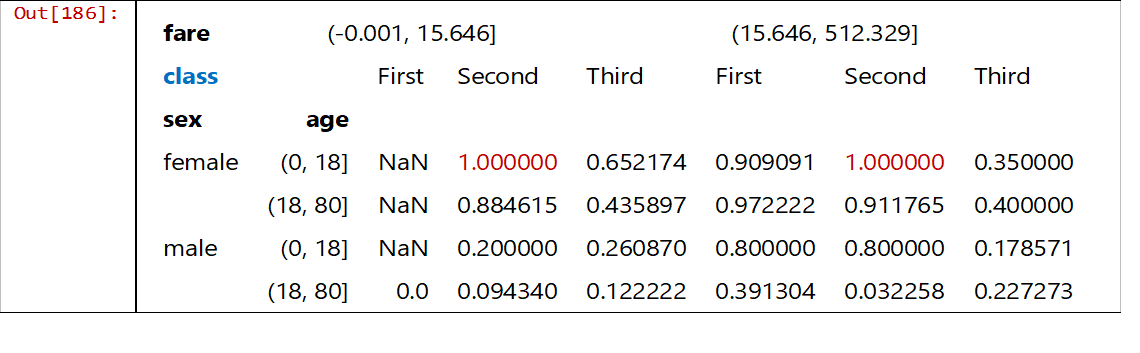

### _Ví dụ 4.9.2.5_ Giá vé trung bình theo giới tính × khoang  

Quay lại hàm tổng hợp mặc định `mean` để tính **giá vé trung bình** cho từng nhóm.

In [22]:
# Giá vé trung bình theo sex × class
pd.pivot_table(
    titanic_data,
    values='fare',
    index='sex',
    columns='class',
    margins=True,
    observed=True
)

class,First,Second,Third,All
sex,,,,
female,108.619680,21.951070,15.875369,47.332433
male,71.142781,21.113131,12.162695,27.268836
All,88.048121,21.471556,13.229435,34.567251


Phân tích:
- Khách hạng nhất phải chi trung bình nhiều hơn rõ rệt so với hạng 2 và 3.
- Khách nữ thường có mức chi trung bình cao hơn nam trong cùng một khoang.

Những quan sát như vậy rất hữu ích khi phân tích hành vi khách hàng và phân khúc thị trường.

## **4.9.4. Các mẫu (pattern) Pivot Table thường gặp trong EDA**
>### 4.9.4.1. Summary Matrix – ma trận giá trị trung bình
Ví dụ: tuổi trung bình theo giới tính × khoang:

In [27]:
pivot_age= pd.pivot_table(titanic_data, values="age",index="sex",columns="class",observed=True)
pivot_age

class,First,Second,Third
sex,,,
female,34.240964,28.722973,21.750000
male,41.281386,30.740707,26.507589


>### 4.9.4.2. Frequency Matrix – ma trận tần suất
Đếm số lượng hành khách theo giới tính × khoang:

In [28]:
pivot_count = pd.pivot_table(
    titanic_data,
    values="survived",
    index="sex",
    columns="class",
    aggfunc="count"
)
pivot_count

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_39736\1687846098.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_count = pd.pivot_table(


class,First,Second,Third
sex,,,
female,83,74,102
male,101,99,253


>### 4.9.4.3. Segmentation Matrix – ma trận phân khúc
Ví dụ: tỷ lệ sống sót trung bình theo **nhóm tuổi** × **giới tính**:

In [9]:
age_bins = pd.cut(titanic_data["age"], [0, 18, 40, 80])
pivot_seg = pd.pivot_table(                  #tạo bảng tổng hợp theo nhóm tuổi,
    titanic_data.assign(age_group=age_bins), #.assign() = thêm cột tạm thời mà không làm thay đổi DataFrame gốc, age_group là tên cột mới thể hiện nhóm tuổi (18-, 18-40, 40+)
    values="survived",
    index="age_group",
    columns="sex",
    aggfunc="mean",
    observed=True        #Đăt tham số observed=True để chỉ hiển thị các nhóm tuổi thực sự tồn tại trong dữ liệu.
)
pivot_seg

sex,female,male
age_group,,
"(0, 18]",0.676471,0.338028
"(18, 40]",0.786207,0.182143
"(40, 80]",0.770833,0.176471


In [8]:
type(pivot_seg)

pandas.core.frame.DataFrame

In [35]:
pivot_seg.index

CategoricalIndex([(0, 18], (18, 40], (40, 80]], categories=[(0, 18], (18, 40], (40, 80]], ordered=True, dtype='category', name='age_group')

## 4.9.5. Trực quan hóa Pivot Table bằng Heatmap
Pivot Table rất phù hợp để trực quan hóa bằng đồ thị **heatmap**, giúp nhìn nhanh vùng giá trị cao/thấp.

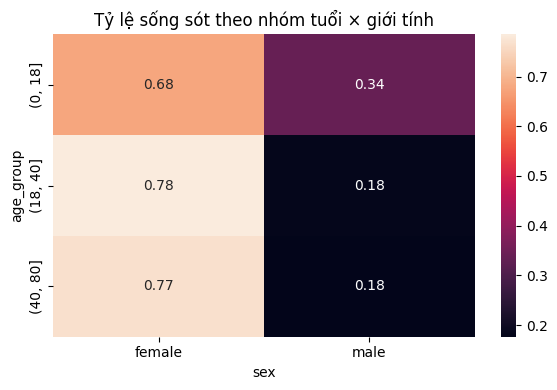

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(pivot_seg, annot=True, fmt=".2f")           #Vẽ đồ thị heatmap từ dữ liệu trong bảng pivot_seg, tham số annot=True để biểu thị giá trị số trên từng ô,
                                                        #fmt=".2f" để định dạng số với 2 chữ số thập phân.
plt.title("Tỷ lệ sống sót theo nhóm tuổi × giới tính")
plt.tight_layout()                                      #Đảm bảo bố cụ không bị cắt xén
plt.show()                                              #vẽ đồ thị trên màn hình

#### Phân tích:
  - Phụ nữ ở mọi lứa tuổi đều sống >68% → ô cam từ trên xuống dưới
  - Đàn ông trưởng thành (18–40 tuổi) là nhóm chết nhiều nhất → ô mầu đen đậm nhất toàn bảng (chỉ ~18%)
  - Trẻ em nam vẫn được ưu tiên hơn đàn ông trưởng thành (34% > 18%)

## 4.9.6. Một số sai lầm phổ biến khi dùng Pivot Table
#### Bảng tổng hợp các lỗi phổ biến 

| Lỗi sai | Mô tả lỗi | Code gây lỗi | Cách khắc phục (đề xuất) |
|--------|-----------|-------------|-----------------------------|
| Bỏ qua **NA** | Tạo pivot khi dữ liệu còn NA → `Index` có NaN → lỗi `ValueError: glycerol index contains duplicate entries` hoặc kết quả sai | `df.pivot_table(values='age', index='sex')`  # nếu có NA | **Trước khi pivot phải dropna hoặc fillna**<br>`df_clean = df.dropna()` <br>hoặc <br>`df_clean = df.fillna({'age': df['age'].median()})` |
| Không kiểm tra **count** | Chỉ tính mean mà không kiểm tra số lượng quan sát → kết quả bị bias do nhóm có quá ít mẫu | `df.pivot_table(values='survived', index='sex', aggfunc='mean')` | Luôn dùng `aggfunc={'mean','count'}` để kiểm tra<br>`df.pivot_table(values='survived', index='sex', aggfunc=['mean','count'])` |
| Nhầm **cut** và **qcut** | Dùng `cut` cho biến lệch → các bin không đều, phân tích sai | `df['fare_bin'] = pd.cut(df['fare'], 4)` | Dùng `pd.qcut()` cho biến lệch<br>`df['fare_bin'] = pd.qcut(df['fare'], 4)` |
| Dùng sai **values / aggfunc** | mean trên cột phân loại → số vô nghĩa | `df.pivot_table(values='embark_town', index='sex', aggfunc='mean')` | Chỉ dùng mean/count trên biến số<br>`df.pivot_table(values='survived', index='sex', aggfunc=['mean','count'])` |
| Nhầm **pivot** và **pivot_table** | Dùng `pivot` khi dữ liệu có duplicate index → lỗi | `df.pivot(index='sex', columns='class', values='survived')` | Dùng `pivot_table()` cho tổng hợp<br>`df.pivot_table(index='sex', columns='class', values='survived', aggfunc='mean')` |
| Không xử lý **MultiIndex** | Pivot nhiều index mà không reset_index → kết quả khó dùng | `pt = df.pivot_table(index=['sex','class'], values='survived')` | Dùng `pivot_table()` cho tổng hợp pivot<br>`pt = pt.reset_index()` |

## 4.9.7. Ứng dụng minh họa trong Finance/Banking (mô tả)
Các bài toán thực tế nơi Pivot Table rất hữu ích:
1. **Phân tích rủi ro tín dụng:**
   - Tỷ lệ nợ xấu theo `nhóm tuổi` × `vùng địa lý`.
   - Dư nợ bình quân theo `phân khúc khách hàng` × `sản phẩm vay`.
2. **Phân tích hành vi giao dịch:**
   - Số lượng giao dịch theo `kênh giao dịch` (quầy, Internet, mobile) × `khung giờ`.
   - Giá trị giao dịch trung bình theo `loại sản phẩm` × `phân khúc`.

## 4.9.8. Crosstab trong Pandas
`pd.crosstab()` là hàm chuyên dụng để tạo **bảng tần suất** giữa các biến phân loại. Về ý tưởng, nó giống Pivot Table nhưng thường dùng cho đếm tần suất và tỉ lệ phần trăm.

>### ***4.9.8.1. Bảng phân tích chéo - Crosstab(Cross-Tabulation) cơ bản*** 
#### **a). Khái niệm: Bảng Tần suất Đa chiều**
`pd.crosstab()` (viết tắt của Cross-Tabulation) là một công cụ thống kê được thiết kế chuyên biệt để tạo ra Bảng tần suất (Frequency Table) giữa hai hoặc nhiều biến phân loại (`Categorical Variables`).

* ##### **Mục tiêu chính**: Đếm số lần xuất hiện (tần suất tuyệt đối) của mọi tổ hợp giá trị giữa các biến được chọn.

* ##### **Tác dụng**: Cung cấp cái nhìn trực quan về phân phối đồng thời (joint distribution) của các biến trong tập dữ liệu.
#### Ví dụ 4.9.8.1. Thống kê xem có bao nhiêu hành khách theo từng tổ hợp của giới tính và khoang tàu.

In [ ]:
#cd_basic: Cross-Tabulation (bảng phân tích chéo)
ct_basic = pd.crosstab(titanic_data["sex"], titanic_data["class"])
ct_basic

class,First,Second,Third
sex,,,
female,83,74,102
male,101,99,253


#### **b). Cú pháp hàm pd.crosstab()**
```python
pd.crosstab(index,
            columns,
            values=None,
            rownames=None,
            colnames=None,
            aggfunc=None,
            margins=False,
            margins_name='All',
            dropna=True,
            normalize=False)
```
#### Một số tham số  quan trọng:


| Tham số        | Bắt buộc? | Ý nghĩa & ví dụ thực tế                                                                                              | Giá trị thường dùng nhất                  |
|:--------------:|:---------:|----------------------------------------------------------------------------------------------------------------------|:------------------------------------------|
| `index`        | Yes       | Biến làm **dòng (hàng)**                                                                                            | `df['sex']`, `df['class']`                |
| `columns`      | Yes       | Biến làm **cột**                                                                                                    | `df['class']`, `df['embarked']`           |
| `values`       | No        | Nếu muốn **không chỉ đếm** mà tính mean/sum… thì truyền cột số vào đây                                              | `df['fare']`, `df['age']`                 |
| `aggfunc`      | No        | Dùng kèm `values` → chọn cách tổng hợp (mean, sum, std…)                                                            | `'mean'`, `'sum'`                         |
| `margins`      | No        | Thêm dòng/cột **Tổng cộng (All)**                                                                                   | `True`                                    |
| `margins_name` | No        | Đổi tên của dòng/cột “All” thành gì bạn muốn                                                                        | `'Tổng cộng'`, `'Total'`                  |
| `normalize`    | No        | Biến bảng thành **tỷ lệ phần trăm** ngay lập tức                                                                    | `'index'`, `'columns'`, `'all'`, `True`   |

#### **c).Ví dụ ứng dụng**

In [ ]:
# 1. Cơ bản nhất: đếm số lượng hành khách theo giới tính và hạng vé
pd.crosstab(titanic_data['sex'], titanic_data['class'])

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


In [ ]:
# 2. Có tổng cộng bao nhiêu hành khách theo giớ tính và hạng vé đã lên tàu
pd.crosstab(titanic_data['sex'], titanic_data['class'], margins=True)

class,First,Second,Third,All
sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


In [ ]:
# 3. Tính % theo hàng (hàng = 100%) – hay dùng nhất!
#Thống kê tỷ lệ phần trăm hành khách trong mỗi giới tính theo từng hạng vé.
pd.crosstab(titanic_data['sex'], titanic_data['class'], normalize='index')

class,First,Second,Third
sex,,,
female,0.299363,0.242038,0.458599
male,0.211438,0.187175,0.601386


#### Nhận xét: Trong tất cả phụ nữ trên tàu:
  1. 29.9% đi khoang First
  2. 24.2% đi khoang Second
  3. 45.9% đi khoang Third
  - → Tổng = 100%

In [ ]:
# 4. Tính % theo cột
#Thống kê tỷ lệ phần trăm hành khách trong mỗi hạng vé theo giới tính
pd.crosstab(titanic_data['sex'], titanic_data['class'], normalize='columns')

class,First,Second,Third
sex,,,
female,0.435185,0.413043,0.293279
male,0.564815,0.586957,0.706721


In [17]:
# 5. Tính % trên tổng toàn bảng
#Thống kê tỷ lệ phần trăm hành khách trong toàn bộ bảng phân tích chéo
pd.crosstab(titanic_data['sex'], titanic_data['class'], normalize='all')

class,First,Second,Third
sex,,,
female,0.105499,0.085297,0.161616
male,0.136925,0.121212,0.389450


In [ ]:
# 6. Không chỉ đếm mà tính trung bình (cực mạnh!)
#Thống kê giá vé trung bình theo giới tính vá hạng vé
pd.crosstab(titanic_data['sex'], titanic_data['class'], #index theo hàng là  giới tính 'sex', theo cột là hạng vé 'class;
            values=titanic_data['fare'],
            aggfunc='mean')                 #hàm aggfunc='mean' để tính giá vé trung bình

class,First,Second,Third
sex,,,
female,106.125798,21.970121,16.118810
male,67.226127,19.741782,12.661633


In [18]:
# 7. Combo (báo cáo) hoàn chỉnh
#Thống kê tổng số hành khách và tỷ lệ % theo giới tính và hạng vé, đồng thời tính % theo hàng để so sánh.
pd.crosstab(titanic_data['sex'], titanic_data['class'],
            margins=True,
            margins_name='Tổng cộng',
            normalize='index').round(3) * 100   # x100 để tính %

class,First,Second,Third
sex,,,
female,29.9,24.2,45.9
male,21.1,18.7,60.1
Tổng cộng,24.2,20.7,55.1


### 4.9.8.3. So sánh nhanh Pivot Table và Crosstab
| Tiêu chí              | Pivot Table                                   | Crosstab                                  |
|-----------------------|-----------------------------------------------|-------------------------------------------|
| Kiểu dữ liệu chính    | Thường có cột values (số)                     | Thường đếm tần suất các hạng mục         |
| Hàm tổng hợp          | `mean`, `sum`, `count`, dict aggfunc          | Mặc định `count`, có thể kết hợp normalize|
| Ứng dụng chính        | Bảng tổng hợp đa chiều                        | Bảng tần suất / bảng chéo (contingency)   |

## 4.9.9. Bài tập tự luyện / gợi ý case study
1. Tạo Pivot Table hiển thị **tuổi trung bình** theo `embark_town` × `sex`.
2. Tạo Crosstab thể hiện **tỷ lệ phần trăm số hành khách** theo `embark_town` × `class`.
3. Dùng `pd.cut()` để chia `fare` thành 3 nhóm (rẻ, trung bình, cao) rồi tạo Pivot Table tỷ lệ sống sót theo `fare_group` × `class`.
4. Vẽ heatmap cho một trong các Pivot Table ở trên.
5. (Nâng cao) Tự tìm hiểu một tình huống trong ngân hàng/tài chính và mô tả cách dùng Pivot Table để trả lời câu hỏi kinh doanh.